Bayesian Nash

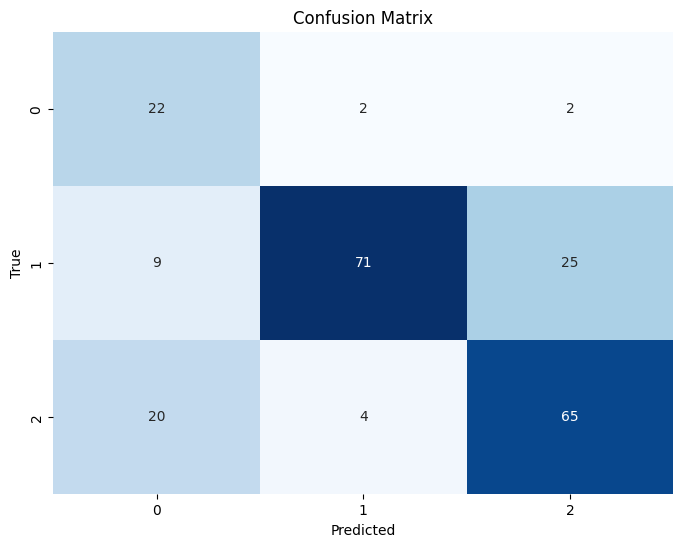

Accuracy: 0.7181818181818181
Confusion Matrix:
[[22  2  2]
 [ 9 71 25]
 [20  4 65]]
Classification Report:
                 precision    recall  f1-score   support

   Bengin cases       0.43      0.85      0.57        26
Malignant cases       0.92      0.68      0.78       105
   Normal cases       0.71      0.73      0.72        89

       accuracy                           0.72       220
      macro avg       0.69      0.75      0.69       220
   weighted avg       0.78      0.72      0.73       220



In [32]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function to load images and labels from a directory
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)

            # Check if the file is an image (you can add more extensions if needed)
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                img = cv2.imread(img_path)

                # Check if the image is successfully loaded
                if img is not None:
                    # Assuming the images are of the same size, you may need to resize them
                    img = cv2.resize(img, (64, 64))
                    images.append(img.flatten())  # Flatten the image to use it as a feature vector
                    labels.append(label)
                else:
                    print(f"Error loading image: {img_path}")
            else:
                print(f"Skipping non-image file: {img_path}")

    return np.array(images), np.array(labels)

# Replace 'your_dataset_path' with the actual path to your dataset
dataset_path = '/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset'

# Load images and labels
X, y = load_images_from_folder(dataset_path)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')



SVM


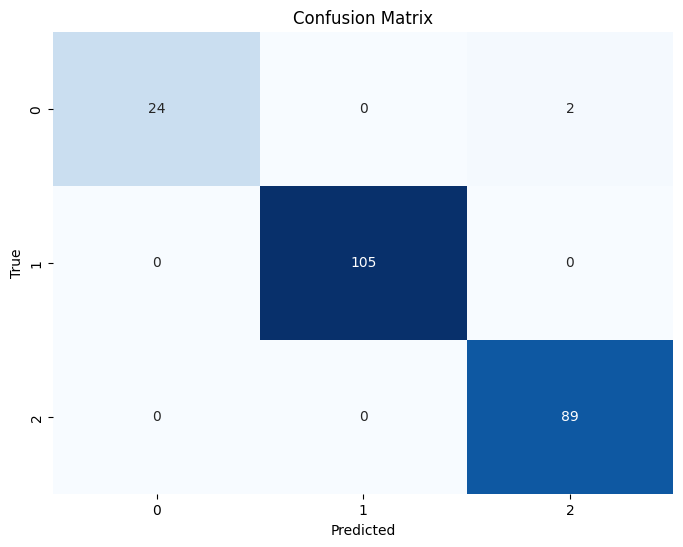

Accuracy: 0.990909090909091
Classification Report:
                 precision    recall  f1-score   support

   Bengin cases       1.00      0.92      0.96        26
Malignant cases       1.00      1.00      1.00       105
   Normal cases       0.98      1.00      0.99        89

       accuracy                           0.99       220
      macro avg       0.99      0.97      0.98       220
   weighted avg       0.99      0.99      0.99       220



In [40]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
# Function to load images and labels from a directory
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)

            # Check if the file is an image (you can add more extensions if needed)
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                img = cv2.imread(img_path)

                # Check if the image is successfully loaded
                if img is not None:
                    # Assuming the images are of the same size, you may need to resize them
                    img = cv2.resize(img, (64, 64))
                    images.append(img.flatten())  # Flatten the image to use it as a feature vector
                    labels.append(label)
                else:
                    print(f"Error loading image: {img_path}")
            else:
                print(f"Skipping non-image file: {img_path}")

    return np.array(images), np.array(labels)

# Replace 'your_dataset_path' with the actual path to your dataset
dataset_path = '/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset'

# Load images and labels
X, y = load_images_from_folder(dataset_path)

# Check the size of the dataset
if len(X) == 0:
    raise ValueError("No images loaded from the dataset. Check your data loading process.")

# Adjust the test size based on the dataset size
test_size = min(0.2, len(X) / 10)  # Use 20% of the dataset for testing or adjust as needed

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)



# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier
svm_classifier.fit(X_train, y_train)
joblib.dump(svm_classifier, 'svm_model.joblib')


# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print accuracy and classification report
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')


Adaboost


Accuracy: 0.7727272727272727
Sensitivity: 0.9859154929577465
Specificity: 1.0
Error Rate: 0.011494252873563218
Confusion Matrix:
[[16  0 10]
 [ 1 70 34]
 [ 1  4 84]]
Classification Report:
                 precision    recall  f1-score   support

   Bengin cases       0.89      0.62      0.73        26
Malignant cases       0.95      0.67      0.78       105
   Normal cases       0.66      0.94      0.77        89

       accuracy                           0.77       220
      macro avg       0.83      0.74      0.76       220
   weighted avg       0.82      0.77      0.77       220



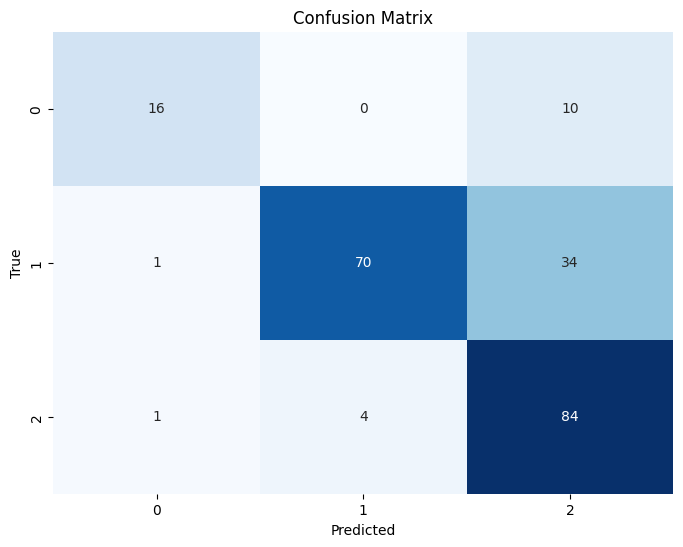

In [33]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load images and labels from a directory
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)

            # Check if the file is an image (you can add more extensions if needed)
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                img = cv2.imread(img_path)

                # Check if the image is successfully loaded
                if img is not None:
                    # Assuming the images are of the same size, you may need to resize them
                    img = cv2.resize(img, (64, 64))
                    images.append(img.flatten())  # Flatten the image to use it as a feature vector
                    labels.append(label)
                else:
                    print(f"Error loading image: {img_path}")
            else:
                print(f"Skipping non-image file: {img_path}")

    return np.array(images), np.array(labels)

# Replace 'your_dataset_path' with the actual path to your dataset
dataset_path = '/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset'

# Load images and labels
X, y = load_images_from_folder(dataset_path)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the AdaBoost classifier with a DecisionTree base estimator
base_classifier = DecisionTreeClassifier(max_depth=1)  # You can experiment with the depth
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate sensitivity, specificity, and error rate
# Calculate sensitivity, specificity, and error rate
tn, fp, fn, tp = conf_matrix[0, 0], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[1, 1]

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
error_rate = (fp + fn) / (tp + tn + fp + fn)

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')
print(f'Error Rate: {error_rate}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [16]:
!pip install hpelm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 864.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.8 MB/s eta 0:00:00


ELM

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/hpelm/nnets/slfn.py:62: RuntimeWarning: overflow encountered in exp
  self.func["sigm"] = lambda X, W, B: 1 / (1 + np.exp(np.dot(X, W) + B))
/usr/local/lib/python3.10/dist-packages/hpelm/nnets/slfn_python.py:65: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  B = np.linalg.lstsq(HH, HT)[0]


Covariance matrix is not full rank; solving with SVD (slow)
This happened because you have duplicated or too many neurons
Accuracy: 0.7681818181818182
Sensitivity: 1.0
Specificity: 0.5
Error Rate: 0.07692307692307693
Confusion Matrix:
[[ 8  8 10]
 [ 0 88 17]
 [ 3 13 73]]
Classification Report:
                 precision    recall  f1-score   support

   Bengin cases       0.73      0.31      0.43        26
Malignant cases       0.81      0.84      0.82       105
   Normal cases       0.73      0.82      0.77        89

       accuracy                           0.77       220
      macro avg       0.75      0.66      0.68       220
   weighted avg       0.77      0.77      0.76       220



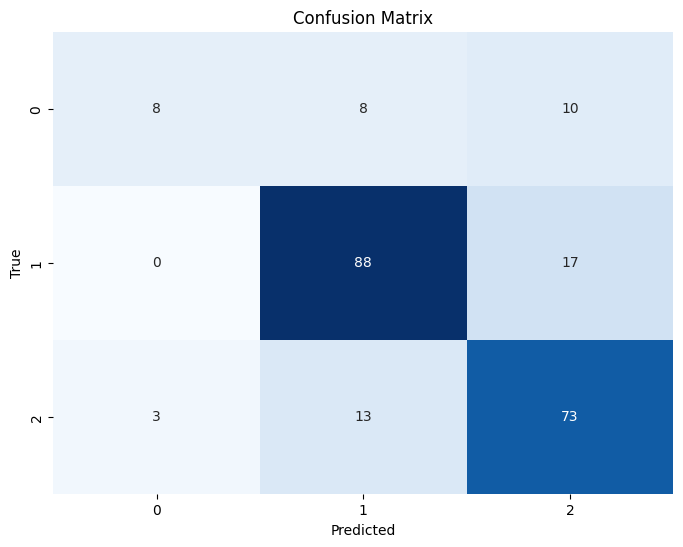

In [39]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from hpelm import ELM

# Function to load images and labels from a directory
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)

            # Check if the file is an image (you can add more extensions if needed)
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                img = cv2.imread(img_path)

                # Check if the image is successfully loaded
                if img is not None:
                    # Assuming the images are of the same size, you may need to resize them
                    img = cv2.resize(img, (64, 64))
                    images.append(img.flatten())  # Flatten the image to use it as a feature vector
                    labels.append(label)
                else:
                    print(f"Error loading image: {img_path}")
            else:
                print(f"Skipping non-image file: {img_path}")

    return np.array(images), np.array(labels)

# Replace 'your_dataset_path' with the actual path to your dataset
dataset_path = '/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset'

# Load images and labels
X, y = load_images_from_folder(dataset_path)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the images
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Convert labels to numerical values
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)
y_test_numeric = label_encoder.transform(y_test)

# Convert numerical labels to one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
y_train_onehot = onehot_encoder.fit_transform(y_train_numeric.reshape(-1, 1))
y_test_onehot = onehot_encoder.transform(y_test_numeric.reshape(-1, 1))

# Specify the number of neurons in the hidden layer
num_neurons = 100  # You can adjust this value

# Initialize the ELM classifier
elm_classifier = ELM(X_train_flat.shape[1], y_train_onehot.shape[1])
elm_classifier.add_neurons(num_neurons, "sigm")

# Train the classifier
elm_classifier.train(X_train_flat, y_train_onehot, 'c')

# Make predictions on the test set
y_pred_onehot = elm_classifier.predict(X_test_flat)

# Convert one-hot encoded predictions back to numerical labels
y_pred_numeric = y_pred_onehot.argmax(axis=1)
y_pred = label_encoder.inverse_transform(y_pred_numeric)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate sensitivity, specificity, and error rate
# Calculate sensitivity, specificity, and error rate
tn, fp, fn, tp = conf_matrix[0, 0], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[1, 1]

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
error_rate = (fp + fn) / (tp + tn + fp + fn)

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')
print(f'Error Rate: {error_rate}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


KNN

Accuracy: 0.9681818181818181
Sensitivity: 1.0
Specificity: 1.0
Error Rate: 0.0
Confusion Matrix:
[[ 21   0   5]
 [  0 105   0]
 [  0   2  87]]
Classification Report:
                 precision    recall  f1-score   support

   Bengin cases       1.00      0.81      0.89        26
Malignant cases       0.98      1.00      0.99       105
   Normal cases       0.95      0.98      0.96        89

       accuracy                           0.97       220
      macro avg       0.98      0.93      0.95       220
   weighted avg       0.97      0.97      0.97       220



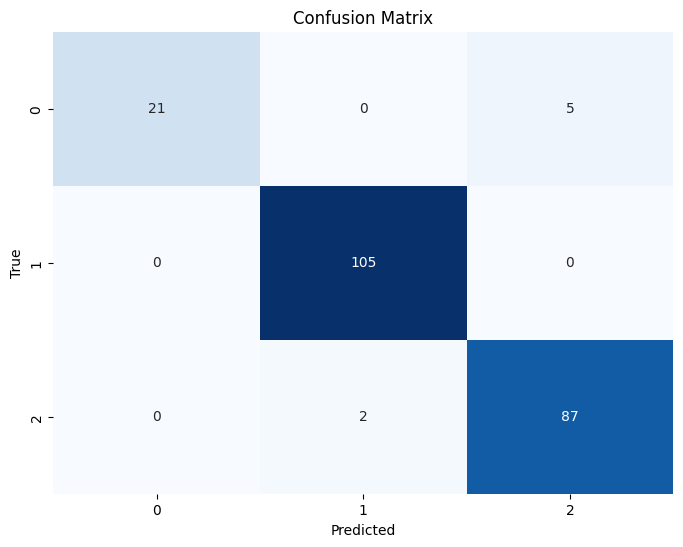

In [22]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
# Function to load images and labels from a directory
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)

            # Check if the file is an image (you can add more extensions if needed)
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                img = cv2.imread(img_path)

                # Check if the image is successfully loaded
                if img is not None:
                    # Assuming the images are of the same size, you may need to resize them
                    img = cv2.resize(img, (64, 64))
                    images.append(img.flatten())  # Flatten the image to use it as a feature vector
                    labels.append(label)
                else:
                    print(f"Error loading image: {img_path}")
            else:
                print(f"Skipping non-image file: {img_path}")

    return np.array(images), np.array(labels)

# Replace 'your_dataset_path' with the actual path to your dataset
dataset_path = '/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset'

# Load images and labels
X, y = load_images_from_folder(dataset_path)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the images
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the classifier
knn_classifier.fit(X_train_flat, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_flat)
joblib.dump(knn_classifier, 'knn_model.joblib')
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate sensitivity, specificity, and error rate
# Calculate sensitivity, specificity, and error rate
tn, fp, fn, tp = conf_matrix[0, 0], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[1, 1]

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
error_rate = (fp + fn) / (tp + tn + fp + fn)

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')
print(f'Error Rate: {error_rate}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
!pip install resize

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 24.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for resize: filename=resize-0.1.0-py3-none-any.whl size=4869 sha256=9b64084ab41dd5a6f24b4b1c15788954a4ca1677a5d5c869f20f82d855e0cc47
  Stored in directory: /root/.cache/pip/wheels/d3/32/39/8ba64724f169b2634807983a01240c787d973149d5f8592e2a
  Created wheel for Pillow: filename=Pillow-5.3.0-cp310-cp310-linux_x86_64.whl size=1014443 sha256=85e47651d13ff5419b5ece309bd11748d2672ab48ded92b2527e85fe600ffdda
  Stored in directory: /root/.cache/pip/wheels/e2/3a/40/5c297d58820b8ed94409be8d00c0cfc762e382b1d2284031f2
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=1a4b85c99fafc81949eee8a6ff2628fc342e483ff2186effe3afd27ccd4382a9
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successf

In [ ]:
!pip install scipy

Bag_Classifier

Accuracy: 0.8318181818181818
Sensitivity: 1.0
Specificity: 0.21428571428571427
Error Rate: 0.09243697478991597
Confusion Matrix:
[[  3  11  12]
 [  0 105   0]
 [  0  14  75]]
Classification Report:
                 precision    recall  f1-score   support

   Bengin cases       1.00      0.12      0.21        26
Malignant cases       0.81      1.00      0.89       105
   Normal cases       0.86      0.84      0.85        89

       accuracy                           0.83       220
      macro avg       0.89      0.65      0.65       220
   weighted avg       0.85      0.83      0.80       220



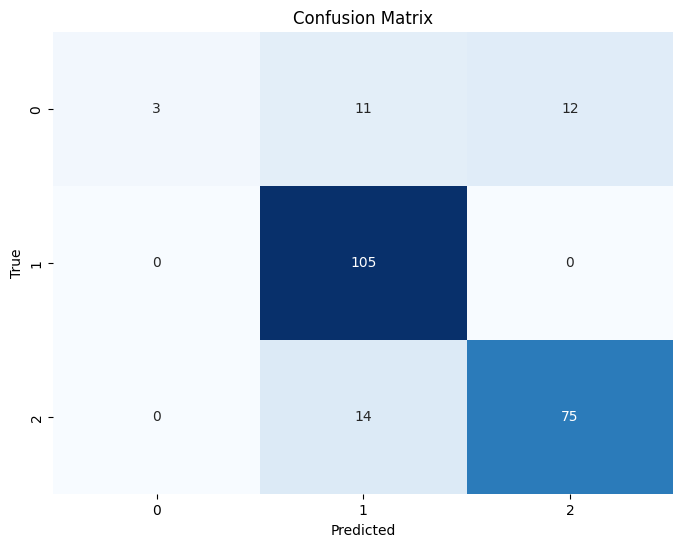

In [6]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load images and labels from a directory
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)

            # Check if the file is an image (you can add more extensions if needed)
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                img = cv2.imread(img_path)

                # Check if the image is successfully loaded
                if img is not None:
                    # Assuming the images are of the same size, you may need to resize them
                    img = cv2.resize(img, (64, 64))
                    images.append(img.flatten())  # Flatten the image to use it as a feature vector
                    labels.append(label)
                else:
                    print(f"Error loading image: {img_path}")
            else:
                print(f"Skipping non-image file: {img_path}")

    return np.array(images), np.array(labels)

# Replace 'your_dataset_path' with the actual path to your dataset
dataset_path = '/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset'

# Load images and labels
X, y = load_images_from_folder(dataset_path)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the images
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Initialize the base classifier (you can adjust parameters as needed)
base_classifier = DecisionTreeClassifier(max_depth=3)

# Initialize the Bagging Classifier
bag_classifier = BaggingClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the classifier
bag_classifier.fit(X_train_flat, y_train)

# Make predictions on the test set
y_pred = bag_classifier.predict(X_test_flat)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate sensitivity, specificity, and error rate
# Calculate sensitivity, specificity, and error rate directly from the confusion matrix
# Calculate sensitivity, specificity, and error rate
tn, fp, fn, tp = conf_matrix[0, 0], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[1, 1]

# Calculate sensitivity, specificity, and error rate
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
error_rate = (fp + fn) / (tp + tn + fp + fn)

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')
print(f'Error Rate: {error_rate}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


FPSOCNN

In [54]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Specify the path to your dataset
dataset_path = '/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset'

# Create an ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
from tensorflow.keras.utils import to_categorical

# Flow training images in batches from the specified directory
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Print class indices to check the assigned labels
print("Class Indices:", train_generator.class_indices)

# Map class indices to class labels in the desired order
class_labels = ['Normal', 'Malignant', 'Benign', 'No']
class_indices = {class_labels[i]: i for i in range(len(class_labels))}

# Create a CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))  # 3 output units for three classes

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the ImageDataGenerator
model.fit(train_generator, epochs=100)
model.summary()

# Save the model to a file
model.save('CNN_MODEL.h5')


Found 1097 images belonging to 4 classes.
Class Indices: {'.ipynb_checkpoints': 0, 'Bengin cases': 1, 'Malignant cases': 2, 'Normal cases': 3}
Epoch 1/100
35/35 [==============================] - 16s 425ms/step - loss: 0.9989 - accuracy: 0.4786
Epoch 2/100
35/35 [==============================] - 15s 415ms/step - loss: 0.9573 - accuracy: 0.5096
Epoch 3/100
35/35 [==============================] - 15s 416ms/step - loss: 0.9447 - accuracy: 0.5178
Epoch 4/100
35/35 [==============================] - 14s 411ms/step - loss: 0.9274 - accuracy: 0.5242
Epoch 5/100
35/35 [==============================] - 14s 389ms/step - loss: 0.9026 - accuracy: 0.5588
Epoch 6/100
35/35 [==============================] - 14s 395ms/step - loss: 0.8984 - accuracy: 0.5597
Epoch 7/100
35/35 [==============================] - 14s 385ms/step - loss: 0.8874 - accuracy: 0.5898
Epoch 8/100
35/35 [==============================] - 14s 396ms/step - loss: 0.9013 - accuracy: 0.5661
Epoch 9/100
35/35 [======================